<a href="https://colab.research.google.com/github/ShayHav/MachineLearning/blob/main/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Shay Havivyan 315367995
2.   Shahar Lankry 208600395


In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
# Implement here
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d

import numpy as np
import pandas as pd

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from keras.datasets import mnist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes
 37% 15.0M/41.0M [00:00<00:00, 156MB/s]
100% 41.0M/41.0M [00:00<00:00, 216MB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [ ]:
# Implement here
# Example for reading one file. It will work if the previous step was successful.

fake_df = pd.read_csv('/content/Fake.csv')
fake_df = fake_df[["text"]].assign(label = 0)
true_df = pd.read_csv('/content/True.csv')
true_df = true_df[["text"]].assign(label = 1)
df = pd.concat([fake_df, true_df])

## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`) and remove English stop words.
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [ ]:
#initialize the TF-IDF vector with the stop word and max feature 1000
vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=1000)
td_idf_vector = vectorizer.fit_transform(df["text"])

#creating the data frame with the words with the highest tf-idf
extracted = pd.DataFrame(td_idf_vector.toarray(), columns = vectorizer.get_feature_names_out())

#scaling the data
scaler = StandardScaler().fit(extracted)
scaledData = scaler.transform(extracted)

#apply k-means
k_means = KMeans(n_clusters=2)
cluster_labels = k_means.fit_predict(scaledData)
centers = k_means.cluster_centers_


## 3. Visualize using scatter plot (15 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction using PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.
* Color the points according to the true labels.

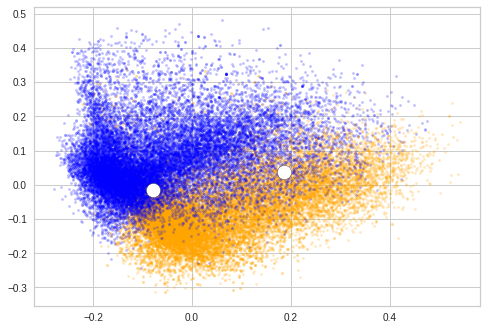

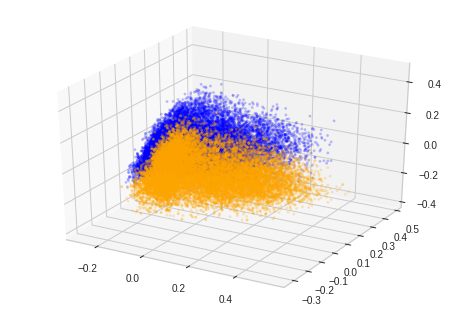

In [ ]:
# 2D
pca = PCA(n_components=2)
applied_pca =  pca.fit_transform(extracted)

# visualize the points belonging to the fake samples. 
plt.scatter(applied_pca[:fake_df.shape[0] ,0], applied_pca[:fake_df.shape[0], 1], marker='.', s=30, lw=0, alpha=0.25, c='orange')

# visualize the points belonging to the real samples.
plt.scatter(applied_pca[fake_df.shape[0]: ,0], applied_pca[fake_df.shape[0]:, 1], marker='.', s=30, lw=0, alpha=0.25, c='blue')

#visualize the centers computed by kmeans.
plt.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor='k')
plt.show()

# 3D
pca = PCA(n_components=3)
applied_pca =  pca.fit_transform(extracted)
fig  = plt.figure()
ax = plt.axes(projection='3d')

# visualize the points belonging to the fake samples. 
ax.scatter(applied_pca[:fake_df.shape[0] ,0], applied_pca[:fake_df.shape[0], 1], applied_pca[:fake_df.shape[0], 2], marker='.', s=30, lw=0, alpha=0.25, c='orange')

# visualize the points belonging to the real samples.
ax.scatter(applied_pca[fake_df.shape[0]: ,0], applied_pca[fake_df.shape[0]:, 1], applied_pca[fake_df.shape[0]:, 2], marker='.', s=30, lw=0, alpha=0.25, c='blue')

#visualize the centers computed by kmeans.
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker="o", c="white", alpha=1, s=200, edgecolor='k')
plt.show()

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [ ]:
# cluster 1 is fake and cluster 2 is real
success = 0
num_of_samples = df.shape[0]
i = 0
for _, row in df.iterrows():
  if cluster_labels[i] == row["label"]:
    success += 1
  i += 1

accuracy_first_case = success / num_of_samples
print(f'Accuracy when cluster 1 represents the fake samples and cluster 2 the real samples {accuracy_first_case}')

# cluster 1 is real and cluster 2 is fake
print(f'Accuracy when cluster 2 represents the fake samples and cluster 1 the real samples {1 - accuracy_first_case}')

print('Based on the results, we conclude that cluster 2 represents the fake samples and cluster 1 the real samples.')

Accuracy when cluster 1 represents the fake samples and cluster 2 the real samples 0.8741146598957638
Accuracy when cluster 2 represents the fake samples and cluster 1 the real samples 0.12588534010423624
Based on the results, we conclude that cluster 2 represents the fake samples and cluster 1 the real samples.


## 5. Find optimal `k` (10 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.
* Computing Silhouette may takes long time. Estimate the Silhouette using a sample of 300 samples uisng the argument `sample_size=300`.

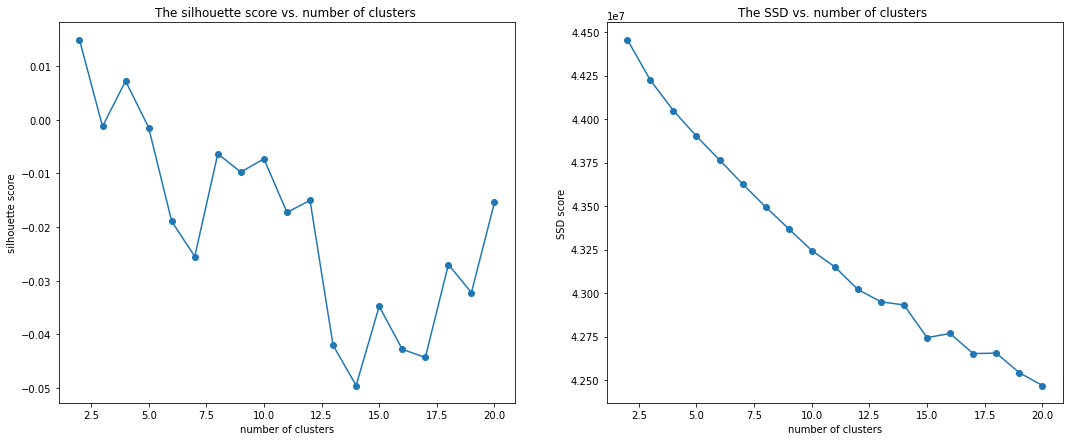

In [ ]:
ssd_res = []
sil_res = []

# creating the plot
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_title("The silhouette score vs. number of clusters ")
ax1.set_xlabel("number of clusters")
ax1.set_ylabel("silhouette score")

ax2.set_title("The SSD vs. number of clusters ")
ax2.set_xlabel("number of clusters")
ax2.set_ylabel("SSD score")

# for each k, run kmeans, extract SSD and compute silhouette score 
for k in range(2, 21):
  k_means = KMeans(n_clusters=k)
  cluster_labels = k_means.fit_predict(scaledData)
  ssd_res.append(k_means.inertia_)
  sil_res.append(silhouette_score(scaledData, cluster_labels, sample_size=300))

# plot the results
ax1.plot(range(2, 21), sil_res, marker = 'o')
ax2.plot(range(2, 21), ssd_res, marker = 'o')

fig.show()

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

Answer:
The graph calculated based on the SSD values should have an elbow-like stracture. Since it doesn't, we can't infer the optimal K from the data in the graph. 
As a result, we choose to focus on the graph based on the sillhouette score. The highest score is achieved when K=2. 
To conclude, we believe the optimal k is 2.  

# 7. PCA then k-means (10 points)

1.   List item
2.   List item


This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA (using all dimenssions)
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

Note:
* When you compute the PCA, don't limit to first PCs, but use all of them.

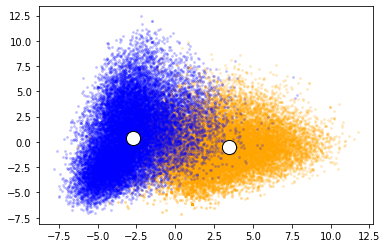

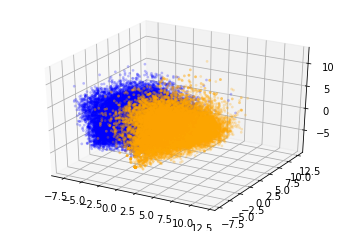

Accuracy when cluster 1 represents the fake samples and cluster 2 the real samples 0.12601897634638515
Accuracy when cluster 2 represents the fake samples and cluster 1 the real samples 0.8739810236536149


In [ ]:
#initialize the TF-IDF vector with the stop word and max feature 1000
vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=1000)
td_idf_vector = vectorizer.fit_transform(df["text"])

#creating the data frame with the words with the highest tf-idf
extracted = pd.DataFrame(td_idf_vector.toarray(), columns = vectorizer.get_feature_names_out())

#scaling the data
scaler = StandardScaler().fit(extracted)
scaledData = scaler.transform(extracted)

# PCA
pca = PCA()
applied_pca1 =  pca.fit_transform(scaledData)

#apply k-means
k_means = KMeans(n_clusters=2)
cluster_labels = k_means.fit_predict(applied_pca1)
centers = k_means.cluster_centers_

# 2D
plt.scatter(applied_pca1[:fake_df.shape[0] ,0], applied_pca1[:fake_df.shape[0], 1], marker='.', s=30, lw=0, alpha=0.25, c='orange')
plt.scatter(applied_pca1[fake_df.shape[0]: ,0], applied_pca1[fake_df.shape[0]:, 1], marker='.', s=30, lw=0, alpha=0.25, c='blue')

plt.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor='k')
plt.show()

# 3D
fig  = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(applied_pca1[:fake_df.shape[0] ,0], applied_pca1[:fake_df.shape[0], 1], applied_pca1[:fake_df.shape[0], 2], marker='.', s=30, lw=0, alpha=0.25, c='orange')
ax.scatter(applied_pca1[fake_df.shape[0]: ,0], applied_pca1[fake_df.shape[0]:, 1], applied_pca1[fake_df.shape[0]:, 2], marker='.', s=30, lw=0, alpha=0.25, c='blue')

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker="o", c="white", alpha=1, s=200, edgecolor='k')
plt.show()

# computing accuracy

# cluster 2 is real and cluster 1 is fake
success = 0
num_of_samples = df.shape[0]
i = 0
for _, row in df.iterrows():
  if cluster_labels[i] == row["label"]:
    success += 1
  i += 1

accuracy = success / num_of_samples
print(f'Accuracy when cluster 1 represents the fake samples and cluster 2 the real samples {accuracy}')

# cluster 1 is real and cluster 2 is fake
print(f'Accuracy when cluster 2 represents the fake samples and cluster 1 the real samples {1-accuracy}')

# MNIST clustering (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10? \\
   * When for computing the accuracy of 10 classes, first you need to define what is the label of each cluster. Do that by majority votes. In theory, you may get two or more clusters with the same labels. We will ignore that for now. Meaning that you don't need to bother in case there are two clusters with the same label according to the majority vote. Simply count what is the fraction of 'other' digits in each cluster.
2. What is the optimal k?
3. How do the results changes if you first run PCA?

The accuracy of kmeans initialized with n_clusters=10 is: 59.10166666666667


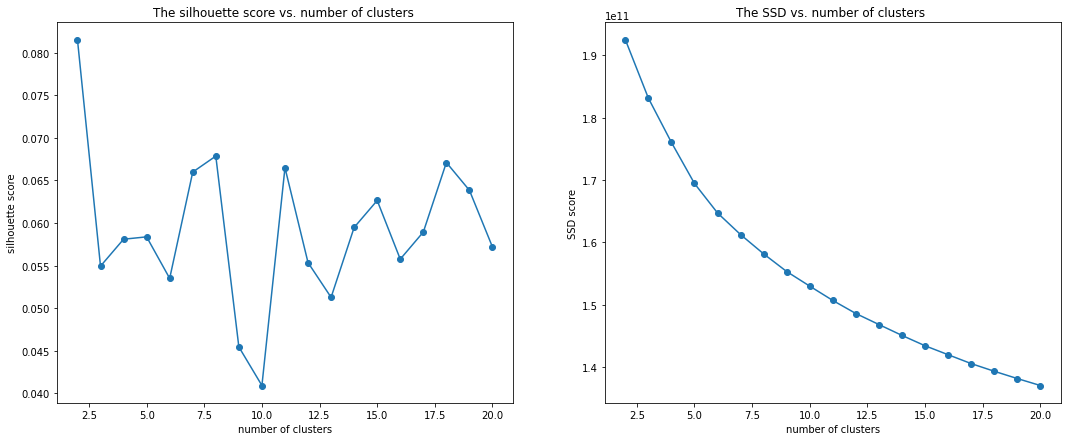

In [ ]:
# Question 1

# load data from mnist database
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

# reshape the shape of the samples to 2 dimensional array. 
x = train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[1])

# running kmeans
k_mean = KMeans(n_clusters=10)
clusters_label = k_mean.fit_predict(x)

# computing accuracy
cluster_to_digit = dict()
accuracy = 0

for i in range(10):
  # creating an array in the len of the samples. 
  # if the jth cell is 1 - the jth sample belongs to the ith cluster, otherwize it does not belong. 

  in_cluster_i = np.where(clusters_label == i, 1, 0)

  # perform mapping - for each x-sample belong to the cluster, we take the mathcing y. 
  ys_in_cluster = train_y[in_cluster_i == 1]

  # creating a distribution of digits in the cluster. how mant samples 
  # from each digit the cluster contains. 
  distribution = np.bincount(ys_in_cluster)

  accuracy += distribution.max()

  # save the labeling of the cluster
  majority_digit = distribution.argmax()
  cluster_to_digit[i] = majority_digit

# accuracy is calculated as the sum of all the major samples in a cluster 
# (therfore, the accurate ones) divided by the number of samples.
accuracy = (accuracy / x.shape[0]) * 100
print(f'The accuracy of kmeans initialized with n_clusters=10 is: {accuracy}')


# computing the optimal k, just as we did in section 5
ssd_res = []
sil_res = []

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_title("The silhouette score vs. number of clusters ")
ax1.set_xlabel("number of clusters")
ax1.set_ylabel("silhouette score")

ax2.set_title("The SSD vs. number of clusters ")
ax2.set_xlabel("number of clusters")
ax2.set_ylabel("SSD score")

for k in range(2, 21):
  k_means = KMeans(n_clusters=k)
  cluster_labels = k_means.fit_predict(x)
  ssd_res.append(k_means.inertia_)
  sil_res.append(silhouette_score(x, cluster_labels, sample_size=300))

ax1.plot(range(2, 21), sil_res, marker = 'o')
ax2.plot(range(2, 21), ssd_res, marker = 'o')

fig.show()

**Answer to question 2:**
Based on the graphs above, we can't determine optimal K. 
The right graph does not have a stracture of elbow, we can't infer the "bend" point in the graph. 
The left graph has the highest silhouette score in K=2, we know that the optimal is K=10 based on our prevoius knowledge. 

The accuracy of kmeans initialized with n_clusters=10 is: 41.18


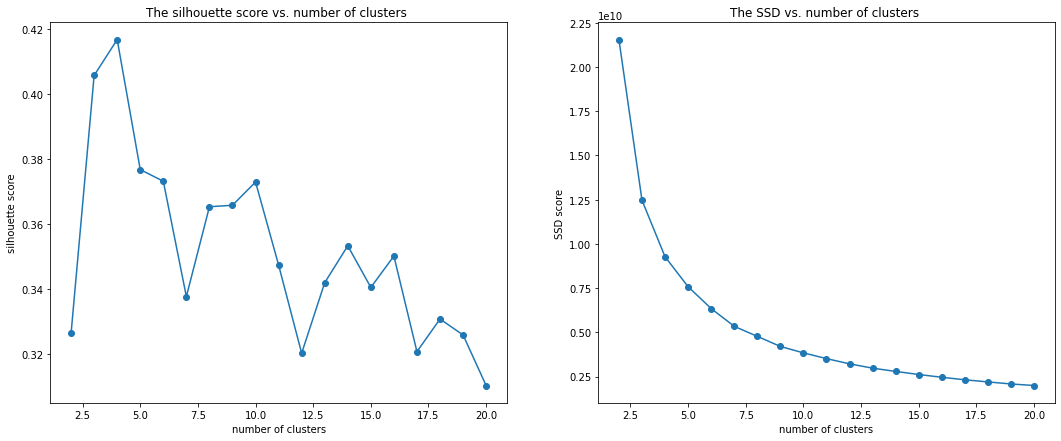

In [ ]:
# Question 3

# load data from mnist database
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

# reshape the shape of the samples to 2 dimensional array. 
x = train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[1])

# run PCA on samples before kmeans
pca = PCA(n_components = 2)
x = pca.fit_transform(x)

# running kmeans
k_mean = KMeans(n_clusters=10)
clusters_label = k_mean.fit_predict(x)

# computing accuracy
cluster_to_digit = dict()
accuracy = 0

for i in range(10):
  # creating an array in the len of the samples. 
  # if the jth cell is 1 - the jth sample belongs to the ith cluster, otherwize it does not belong. 

  in_cluster_i = np.where(clusters_label == i, 1, 0)

  # perform mapping - for each x-sample belong to the cluster, we take the mathcing y. 
  ys_in_cluster = train_y[in_cluster_i == 1]

  # creating a distribution of digits in the cluster. how mant samples 
  # from each digit the cluster contains. 
  distribution = np.bincount(ys_in_cluster)

  accuracy += distribution.max()

  # save the labeling of the cluster
  majority_digit = distribution.argmax()
  cluster_to_digit[i] = majority_digit

# accuracy is calculated as the sum of all the major samples in a cluster 
# (therfore, the accurate ones) divided by the number of samples.
accuracy = (accuracy / x.shape[0]) * 100
print(f'The accuracy of kmeans initialized with n_clusters=10 is: {accuracy}')


# computing the optimal k, just as we did in section 5
ssd_res = []
sil_res = []

fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_title("The silhouette score vs. number of clusters ")
ax1.set_xlabel("number of clusters")
ax1.set_ylabel("silhouette score")

ax2.set_title("The SSD vs. number of clusters ")
ax2.set_xlabel("number of clusters")
ax2.set_ylabel("SSD score")

for k in range(2, 21):
  k_means = KMeans(n_clusters=k)
  cluster_labels = k_means.fit_predict(x)
  ssd_res.append(k_means.inertia_)
  sil_res.append(silhouette_score(x, cluster_labels, sample_size=300))

ax1.plot(range(2, 21), sil_res, marker = 'o')
ax2.plot(range(2, 21), ssd_res, marker = 'o')

fig.show()

**Answer to Question 3:**
If we run first PCA, we notice a substantial decrease in the accuracy.
A reasonable explantation to the decrease is that we reduced the dimention from 784 to 2, which caused a significant loss of data.
As to the optimal K, we still can't infer the optimal k from the graphs. neither of the graphs implies that the optimal K is 10. 

# Compute projection (10 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

In [ ]:
# Answer here and show your computations (no code)

u = $\begin{pmatrix}
1 \\
2
\end{pmatrix}$
 is the leading vector becuase it match the highest egienvalue of 5.

 The projection is computed as the multiplication of u and the vectors.


 $\begin{pmatrix}
1 \\
2
\end{pmatrix}$ ·
$\begin{pmatrix}
1 & 3
\end{pmatrix}$ = 1 ·1 + 2 ·3 = 7.

 $\begin{pmatrix}
1 \\
2
\end{pmatrix}$ ·
$\begin{pmatrix}
3 & 7
\end{pmatrix}$ = 1 ·3 + 2 · 7 = 17.